In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import os 
import numpy as np 
import sys  
sys.path.append("../")
from utils import analysis_utils #, git_utils

In [3]:
outputdir = "../output/evaluation/processed"
projects = ['Lang', 'Math', 'Time', 'Closure', 'Cli', 'Compress', 'Codec', 'Collections', 'Csv', 
    'JacksonCore', 'JacksonXml', 'JxPath', 'Jsoup']

FULL_MUTOPS = [
    'MathMutator','ConditionalsBoundaryMutator',
    'IncrementsMutator','InvertNegsMutator','NegateConditionalsMutator','VoidMethodCallMutator','PrimitiveReturnsMutator','EmptyObjectReturnValsMutator',
    'BooleanFalseReturnValsMutator','BooleanTrueReturnValsMutator','NullReturnValsMutator',
    ] 

MUTOPS = [
    'MATH','CONDITIONALS_BOUNDARY',
    'INCREMENTS','INVERT_NEGS','NEGATE_CONDITIONALS','VOID_METHOD_CALLS','PRIMITIVE_RETURNS','EMPTY_RETURNS',
    'FALSE_RETURNS','TRUE_RETURNS','NULL_RETURNS']

# Mutation Operators

Compare useful mutation operators between live, killed, latent (and further non-latent, discarded)

### Live (SURVIVED) / KILLED

In [4]:
cnt_top_n_freqs = [0] * len(FULL_MUTOPS)
target_status ='SURVIVED' # KILLED
decimal_points = 1
n_top = 3 

print (" & " + " & ".join(MUTOPS))
dfs = []
for i, project in enumerate(projects):
    df = pd.read_csv(os.path.join(outputdir, f"{project}.init_pit_indv_mut_status.csv"))    
    dfs.append(df)
    cnt_top_n_freqs = analysis_utils.analyse_mutOp_and_mut_status(FULL_MUTOPS, df, project, target_status, decimal_points, cnt_top_n_freqs, n_top)
# total 
combined_df = pd.concat(dfs)
cnt_top_n_freqs = analysis_utils.analyse_mutOp_and_mut_status(FULL_MUTOPS, combined_df, 'Total', target_status, decimal_points, cnt_top_n_freqs, n_top)

_cnt_top_n_freqs = [v for v in cnt_top_n_freqs]
sorted_freq = np.sort(_cnt_top_n_freqs)[::-1]
max_freq = sorted_freq[0]
idx_to_max = np.where(_cnt_top_n_freqs == max_freq)[0]
indices_to_remain_top = []
for v in sorted_freq[len(idx_to_max):n_top]:
    indices_to_remain_top.extend(np.where(cnt_top_n_freqs == v)[0].tolist())

top_n_freq_line = "TopFreq"
for i, cnt in enumerate(cnt_top_n_freqs):
    if cnt == -1:
        top_n_freq_line += " & -"
    else:
        if i in idx_to_max:
            top_n_freq_line += " & \\cellcolor{blue!25}" + "\\textbf{" + str(cnt) + "}"
        elif i in indices_to_remain_top:
            top_n_freq_line += " & \\cellcolor{green!25}" + str(cnt)
        else:
            top_n_freq_line += f" & {cnt}" 
print (top_n_freq_line + "\\\\")

 & MATH & CONDITIONALS_BOUNDARY & INCREMENTS & INVERT_NEGS & NEGATE_CONDITIONALS & VOID_METHOD_CALLS & PRIMITIVE_RETURNS & EMPTY_RETURNS & FALSE_RETURNS & TRUE_RETURNS & NULL_RETURNS
Lang & \cellcolor{green!25}13.1 & \cellcolor{blue!25}\textbf{32.4} & 1.2 & 3.1 & 2.2 & \cellcolor{green!25}6.3 & 5.0 & 1.5 & 0.0 & 1.9 & 0.8\\
Math & 8.9 & \cellcolor{blue!25}\textbf{31.6} & 1.1 & \cellcolor{green!25}10.3 & 6.0 & \cellcolor{green!25}16.5 & 3.5 & 0.9 & 6.1 & 9.6 & 0.3\\
Time & 10.9 & \cellcolor{blue!25}\textbf{30.8} & 8.1 & \cellcolor{green!25}19.4 & 6.4 & \cellcolor{green!25}13.3 & 1.0 & 4.6 & 2.6 & 7.7 & 5.2\\
Closure & 10.1 & \cellcolor{blue!25}\textbf{26.4} & 8.0 & 0.0 & 3.6 & \cellcolor{green!25}19.4 & 5.0 & 3.6 & 6.0 & 7.2 & \cellcolor{green!25}18.7\\
Cli & 14.3 & \cellcolor{blue!25}\textbf{41.6} & 4.3 & - & 2.6 & 8.8 & 4.3 & 3.7 & 5.3 & \cellcolor{green!25}16.7 & \cellcolor{blue!25}\textbf{41.6}\\
Compress & \cellcolor{green!25}17.1 & \cellcolor{blue!25}\textbf{42.2} & 6.0 & 0.0 & 9.

### Latent

In [5]:
cnt_top_n_freqs = [0] * len(MUTOPS)
target_status = 'latent' 
decimal_points = 2
n_top = 3
threshold = 365

print (" & " + " & ".join(MUTOPS))
dfs = []
# check and find out top 3 most useful operators
for i, project in enumerate(projects):
    df = pd.read_csv(os.path.join(outputdir, f"{project}.indv_mut_propagation_status_and_debt.csv"))    
    df = df.loc[~((df.status == 'latent') & (df.debt_time > threshold))]
    if (df.status == 'latent').sum() == 0:
        continue 
    df = df.loc[~((df.status == 'non-latent') & (df.debt_time <= threshold))]
    dfs.append(df)
    cnt_top_n_freqs = analysis_utils.analyse_mutOp_and_mut_status(MUTOPS, df, project, target_status, decimal_points, cnt_top_n_freqs, n_top)
# total 
combined_df = pd.concat(dfs)
cnt_top_n_freqs = analysis_utils.analyse_mutOp_and_mut_status(MUTOPS, combined_df, 'Total', target_status, decimal_points, cnt_top_n_freqs, n_top)


# compute the frequency of operators within top 3 
_cnt_top_n_freqs = [v for v in cnt_top_n_freqs]
sorted_freq = np.sort(_cnt_top_n_freqs)[::-1]
max_freq = sorted_freq[0]
idx_to_max = np.where(_cnt_top_n_freqs == max_freq)[0]
indices_to_remain_top = []
for v in sorted_freq[len(idx_to_max):n_top]:
    indices_to_remain_top.extend(np.where(cnt_top_n_freqs == v)[0].tolist())

top_n_freq_line = "TopFreq"
for i, cnt in enumerate(cnt_top_n_freqs):
    if cnt == -1:
        top_n_freq_line += " & -"
    else:
        if i in idx_to_max:
            top_n_freq_line += " & \\cellcolor{blue!25}" + "\\textbf{" + str(cnt) + "}"
        elif i in indices_to_remain_top:
            top_n_freq_line += " & \\cellcolor{green!25}" + str(cnt)
        else:
            top_n_freq_line += f" & {cnt}" 
print (top_n_freq_line + "\\\\")

 & MATH & CONDITIONALS_BOUNDARY & INCREMENTS & INVERT_NEGS & NEGATE_CONDITIONALS & VOID_METHOD_CALLS & PRIMITIVE_RETURNS & EMPTY_RETURNS & FALSE_RETURNS & TRUE_RETURNS & NULL_RETURNS
Lang & \cellcolor{green!25}7.14 & 3.42 & \cellcolor{green!25}16.67 & 0.0 & 6.35 & \cellcolor{blue!25}\textbf{17.39} & 0.0 & 5.88 & - & 0.0 & 0.0\\
Math & \cellcolor{green!25}13.15 & 4.09 & 0.0 & \cellcolor{green!25}17.39 & \cellcolor{blue!25}\textbf{27.35} & 5.76 & 2.33 & 0.0 & 0.0 & 6.25 & 0.0\\
Time & \cellcolor{green!25}0.0 & \cellcolor{green!25}0.0 & - & - & \cellcolor{green!25}13.33 & \cellcolor{blue!25}\textbf{23.08} & \cellcolor{green!25}0.0 & \cellcolor{green!25}0.0 & - & \cellcolor{green!25}0.0 & -\\
Closure & 0.0 & 0.8 & 0.0 & - & \cellcolor{blue!25}\textbf{11.23} & 0.41 & \cellcolor{green!25}2.33 & \cellcolor{green!25}4.0 & 1.85 & 1.08 & 0.46\\
Cli & \cellcolor{green!25}7.69 & \cellcolor{blue!25}\textbf{9.59} & 0.0 & - & 0.0 & \cellcolor{green!25}2.63 & 0.0 & 0.0 & 0.0 & 0.0 & 1.39\\
Compress & 

#### Comparison between latent/non-latent/discarded

Matplotlib is building the font cache; this may take a moment.


CONDITIONALS_BOUNDARY


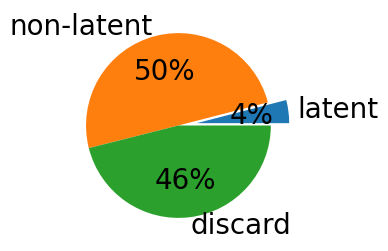

EMPTY_RETURNS


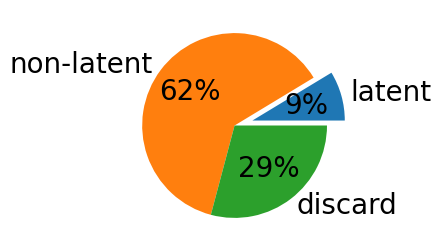

FALSE_RETURNS


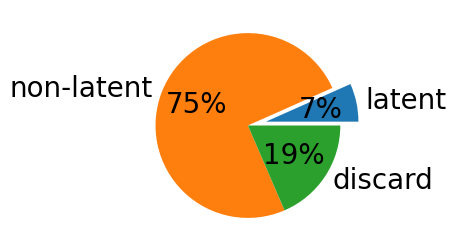

INCREMENTS


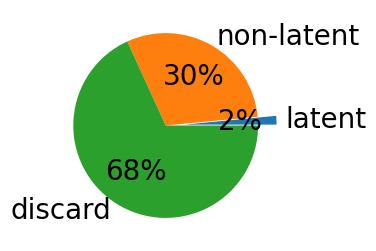

INVERT_NEGS


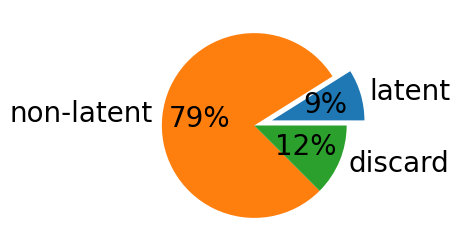

MATH


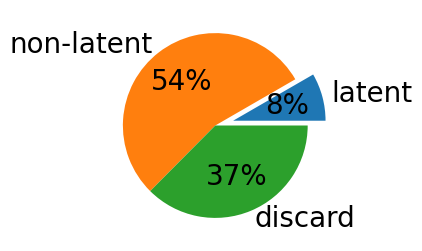

NEGATE_CONDITIONALS


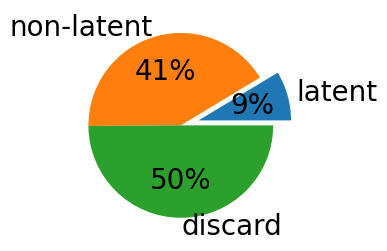

NULL_RETURNS


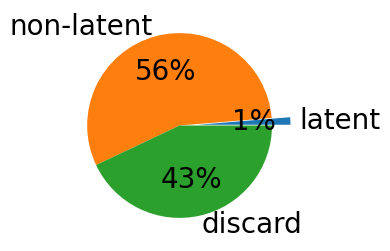

PRIMITIVE_RETURNS


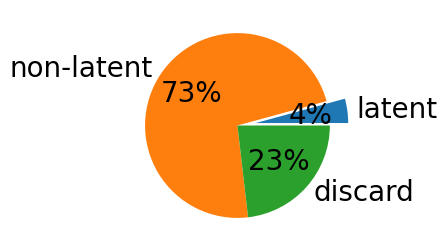

TRUE_RETURNS


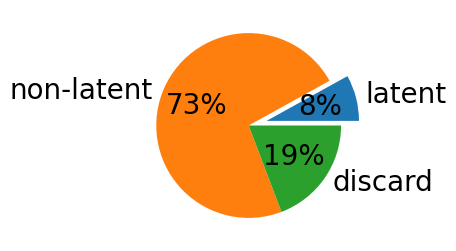

VOID_METHOD_CALLS


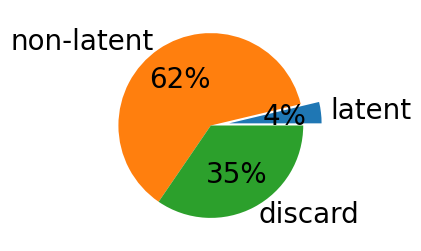

In [7]:
import matplotlib.pyplot as plt 

dfs = []
for project in projects:
    df = pd.read_csv(os.path.join(outputdir, f"{project}.indv_mut_propagation_status.csv"))    
    if project == 'Math':
        df = df.loc[df.bid != 59]
    dfs.append(df)
cdf = pd.concat(dfs) 
for mutOp, adf in cdf.groupby('mutOp'):
    print (mutOp)
    adf = cdf.loc[cdf.mutOp == mutOp]
    fig, ax = plt.subplots(figsize = (4,3))
    n_latent = adf.groupby('status').size()['latent']
    n_non_latent = adf.groupby('status').size()['non-latent'] 
    n_discard = adf.groupby('status').size()['discard']
    explode = [0.2, 0., 0.]
    ax.pie([n_latent, n_non_latent, n_discard], labels=['latent', 'non-latent', 'discard'],
        explode=explode, 
        autopct='%.0f%%', textprops = {'fontsize':20})
    plt.show()

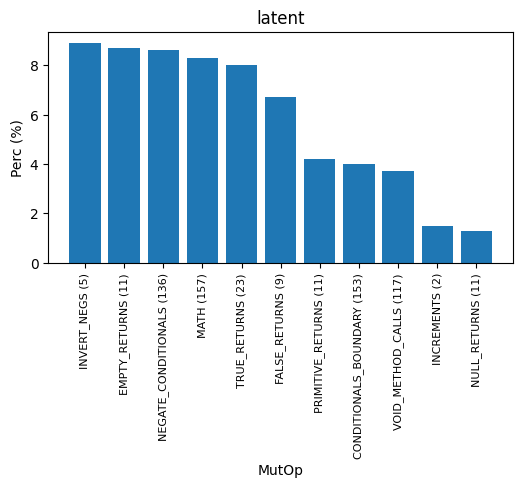

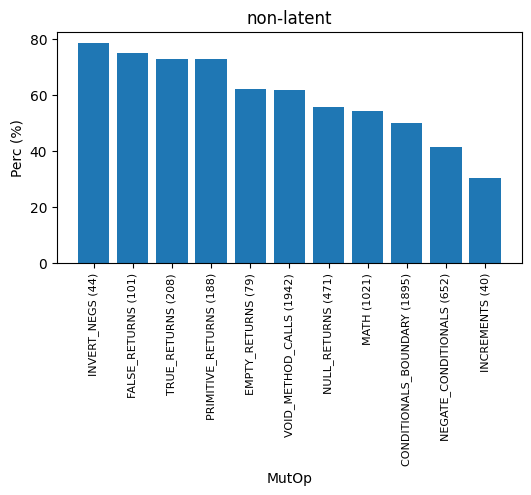

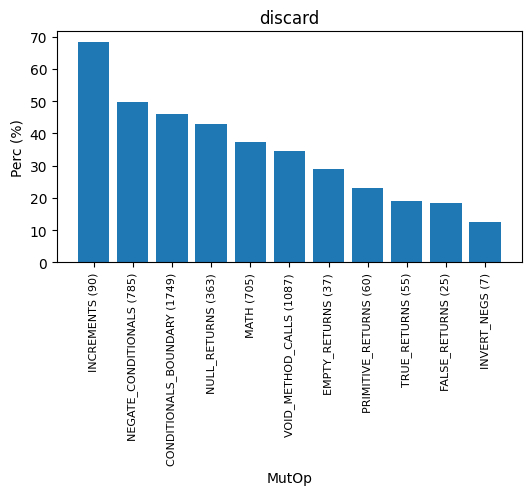

In [50]:
percs = {'latent':[], 'non-latent':[], 'discard':[]}
for mutOp, adf in cdf.groupby('mutOp'):
    for k in percs:
        percs[k].append([mutOp, np.round(100 * (adf.status == k).sum()/len(adf), decimals=1), (adf.status == k).sum()])

# latent 
for k in ['latent', 'non-latent', 'discard']:
    fig, ax = plt.subplots(figsize = (6,3))
    sorted_v = sorted(percs[k], key = lambda v:v[1], reverse=True)
    xs = np.arange(len(sorted_v))
    ax.bar(xs, [v[1] for v in sorted_v])

    ax.set_xlabel("MutOp")
    ax.set_ylabel("Perc (%)")
    ax.set_title(f"{k}")
    ax.set_xticks(xs)
    ax.set_xticklabels([f"{v[0]} ({v[2]})" for v in sorted_v], fontsize = 8, rotation = 90)
    plt.show()
    #break 


In [35]:
combined_percs = {'latent':[], 'non-latent & discard':[]}
for mutOp, adf in cdf.groupby('mutOp'):
    for k in percs:
        if k == 'non-latent & discard':
        else:
            percs[k].append([mutOp, np.round(100 * (adf.status == k).sum()/len(adf), decimals=1), (adf.status == k).sum()])

# latent 
for k in ['latent', 'non-latent & discard']:
    fig, ax = plt.subplots(figsize = (6,3))
    sorted_v = sorted(percs[k], key = lambda v:v[1], reverse=True)
    xs = np.arange(len(sorted_v))
    ax.bar(xs, [v[1] for v in sorted_v])

    ax.set_xlabel("MutOp")
    ax.set_ylabel("Perc (%)")
    ax.set_title(f"{k}")
    ax.set_xticks(xs)
    ax.set_xticklabels([f"{v[0]} ({v[2]})" for v in sorted_v], fontsize = 8, rotation = 90)
    plt.show()


['INVERT_NEGS',
 'EMPTY_RETURNS',
 'NEGATE_CONDITIONALS',
 'MATH',
 'TRUE_RETURNS',
 'FALSE_RETURNS',
 'PRIMITIVE_RETURNS',
 'CONDITIONALS_BOUNDARY',
 'VOID_METHOD_CALLS',
 'INCREMENTS',
 'NULL_RETURNS']

In [53]:
combined_percs = {'latent':percs['latent'], 'non-latent & discard':[]}

nl_vs = sorted(percs['non-latent'], key = lambda v: v[0])
ds_vs = sorted(percs['discard'], key = lambda v: v[0])
for v1,v2 in zip(nl_vs, ds_vs):
    assert v1[0] == v2[0]
    combined_percs['non-latent & discard'].append([v1[0], v1[1] + v2[1], v1[2] + v2[2]])

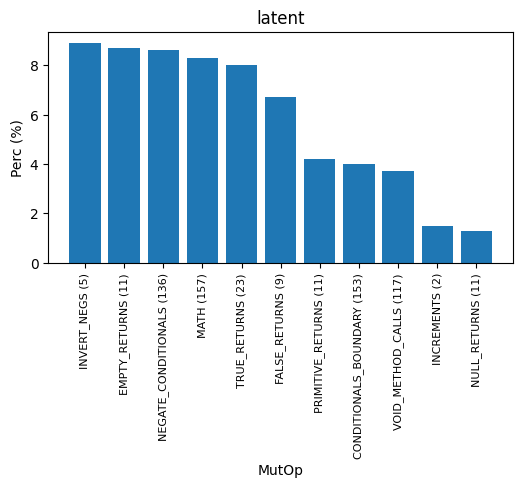

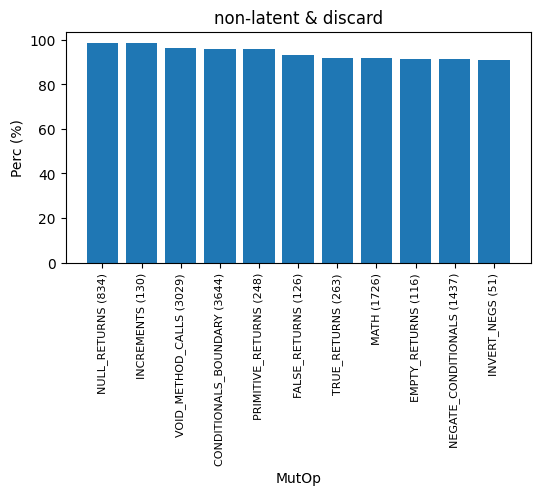

In [54]:
# latent 
for k in ['latent', 'non-latent & discard']:
    fig, ax = plt.subplots(figsize = (6,3))
    sorted_v = sorted(combined_percs[k], key = lambda v:v[1], reverse=True)
    xs = np.arange(len(sorted_v))
    ax.bar(xs, [v[1] for v in sorted_v])

    ax.set_xlabel("MutOp")
    ax.set_ylabel("Perc (%)")
    ax.set_title(f"{k}")
    ax.set_xticks(xs)
    ax.set_xticklabels([f"{v[0]} ({v[2]})" for v in sorted_v], fontsize = 8, rotation = 90)
    plt.show()

In [61]:
(cdf.status == 'latent').sum(), (cdf.status == 'non-latent').sum(), (cdf.status == 'discard').sum(), len(cdf)

(np.int64(635), np.int64(6641), np.int64(4963), 12239)